# Análisis exploratorio de datos

Contentesta las siguientes preguntas escribiendo el código de Python necesario para encontrar las respuestas o producir las gráficas necesarias

---


In [1]:
# No mostrar advertencias
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

### 1. ¿Cuál es la distribución de edades de los clientes?
- **Objetivo**: Comprender la distribución de las edades en el conjunto de datos.
- **Respuesta esperada**: Un histograma de la columna Age.

In [4]:
df = pd.read_csv('./data/retailmax.csv')
df.sample(5)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
124,125,Female,23,70,29
131,132,Male,39,71,75
92,93,Male,48,60,49
137,138,Male,32,73,73
12,13,Female,58,20,15


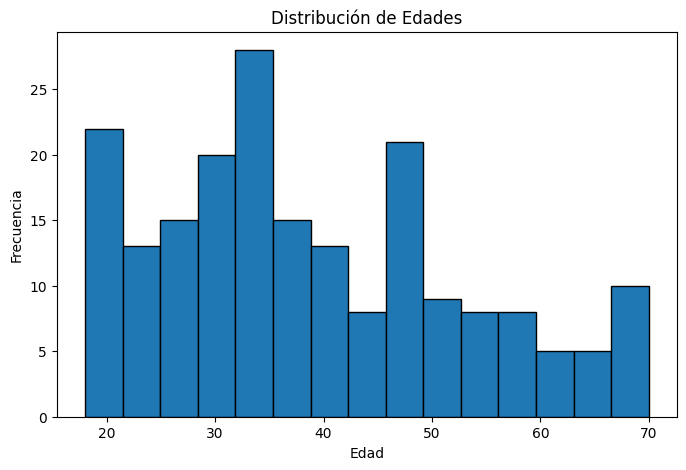

In [5]:
plt.figure(figsize=(8,5))
plt.hist(df['Age'], bins=15, edgecolor='black')
plt.title('Distribución de Edades')
plt.xlabel('Edad')
plt.ylabel('Frecuencia')
plt.show()


### 2. ¿Existen diferencias significativas en los ingresos anuales entre hombres y mujeres?
- **Objetivo**: Comparar la distribución de ingresos anuales entre géneros.
- **Respuesta esperada**: Una gráfica de cajas (boxplot) que muestre la distribución de Annual Income (k$) por género.

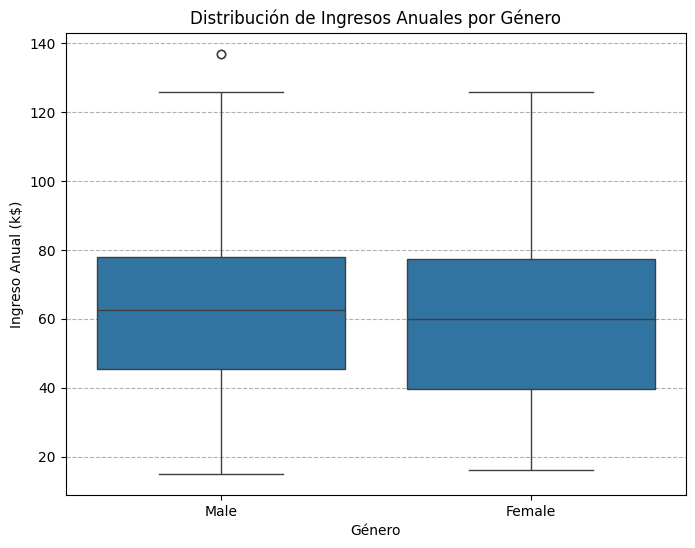

In [6]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='Gender', y='Annual Income (k$)', data=df)
plt.title('Distribución de Ingresos Anuales por Género')
plt.xlabel('Género')
plt.ylabel('Ingreso Anual (k$)')
plt.grid(axis='y', linestyle='--')
plt.show()

### 3. ¿Cómo se distribuye la puntuación de gasto (Spending Score) entre los diferentes rangos de edad?
- **Objetivo**: Analizar la relación entre la edad y la puntuación de gasto.
- **Respuesta esperada**: Una gráfica de dispersión (scatter plot) o un gráfico de cajas que compare la Spending Score (1-100) con diferentes grupos de edad.

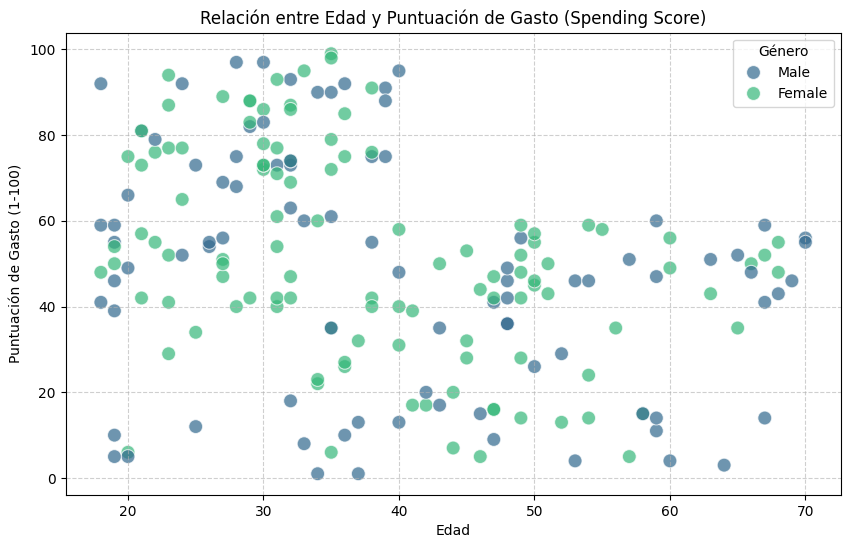

In [7]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Age', y='Spending Score (1-100)', data=df, hue='Gender', palette='viridis', s=100, alpha=0.7)
plt.title('Relación entre Edad y Puntuación de Gasto (Spending Score)')
plt.xlabel('Edad')
plt.ylabel('Puntuación de Gasto (1-100)')
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend(title='Género')
plt.show()

### 4. ¿Cuál es la correlación entre el ingreso anual y la puntuación de gasto?
- **Objetivo**: Identificar si existe una relación lineal entre el ingreso y el gasto.
- **Respuesta esperada**: Una gráfica de dispersión y el cálculo del coeficiente de correlación entre Annual Income (k$) y Spending Score (1-100).

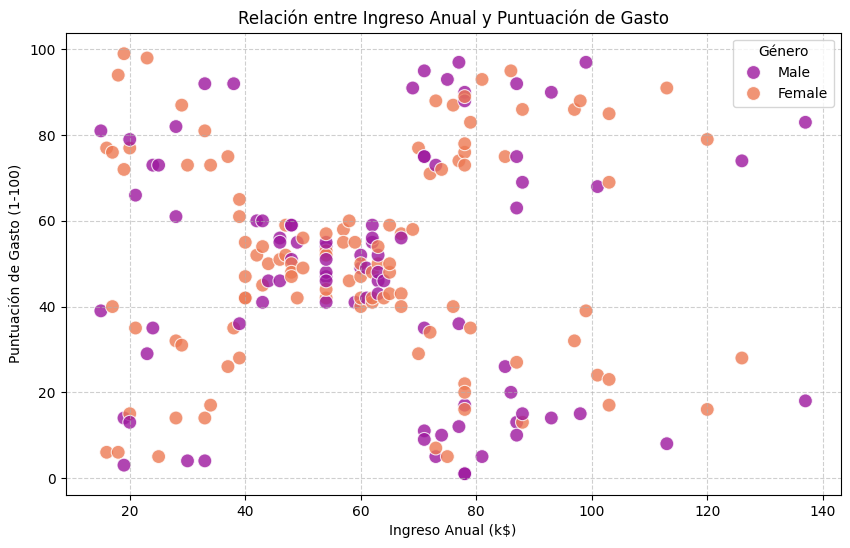

In [8]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', data=df, hue='Gender', palette='plasma', s=100, alpha=0.8)
plt.title('Relación entre Ingreso Anual y Puntuación de Gasto')
plt.xlabel('Ingreso Anual (k$)')
plt.ylabel('Puntuación de Gasto (1-100)')
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend(title='Género')
plt.show()

### 5. ¿Cómo varía la puntuación de gasto en diferentes grupos de ingresos anuales?
- **Objetivo**: Examinar cómo los clientes en diferentes rangos de ingresos se comportan en términos de gasto.
- **Respuesta esperada**: Una gráfica de cajas o de violín que muestre la Spending Score (1-100) para diferentes rangos de Annual Income (k$).

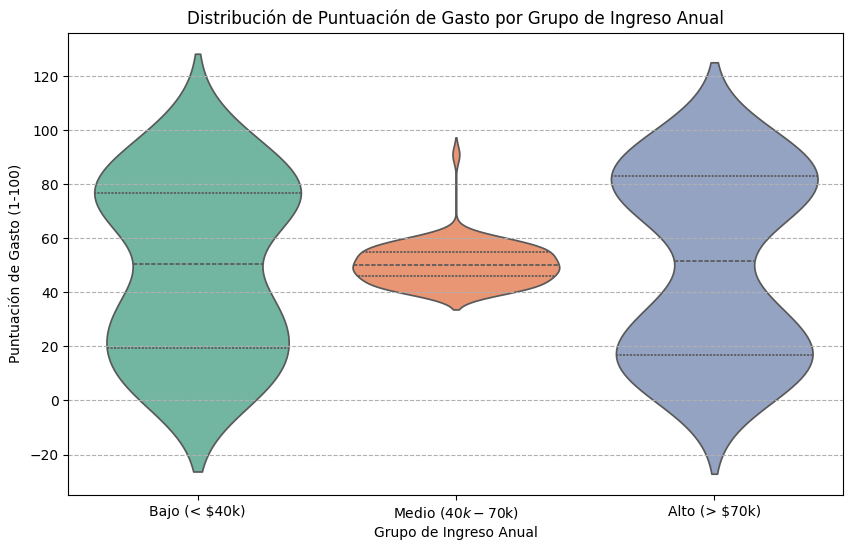

In [9]:
# Definición de los límites y etiquetas para los grupos de ingreso
bins = [0, 40, 70, 140]  # Incluye el rango máximo observado en los datos
labels = ['Bajo (< $40k)', 'Medio ($40k - $70k)', 'Alto (> $70k)']
df['Income Group'] = pd.cut(df['Annual Income (k$)'], bins=bins, labels=labels, right=False)

plt.figure(figsize=(10, 6))
# Gráfico de violín
sns.violinplot(x='Income Group', y='Spending Score (1-100)', data=df, palette='Set2', inner='quartile')
plt.title('Distribución de Puntuación de Gasto por Grupo de Ingreso Anual')
plt.xlabel('Grupo de Ingreso Anual')
plt.ylabel('Puntuación de Gasto (1-100)')
plt.grid(axis='y', linestyle='--')
plt.show()

### 6. ¿Cuál es la proporción de clientes por género?
- **Objetivo**: Determinar el balance de género en el conjunto de datos.
- **Respuesta esperada**: Una gráfica de barras o un gráfico de pastel que muestre la proporción de hombres y mujeres.

In [10]:
gender_counts = df['Gender'].value_counts()
gender_proportions = gender_counts / gender_counts.sum() * 100

print("Frecuencia de Clientes por Género:")
print(gender_counts)
print("\nProporción de Clientes por Género (%):")
print(gender_proportions.round(2))

Frecuencia de Clientes por Género:
Gender
Female    112
Male       88
Name: count, dtype: int64

Proporción de Clientes por Género (%):
Gender
Female    56.0
Male      44.0
Name: count, dtype: float64


### 7. ¿Qué grupos de edad gastan más en promedio?
- **Objetivo**: Identificar los grupos de edad que tienen una mayor puntuación de gasto en promedio.
- **Respuesta esperada**: Una gráfica de barras que compare la puntuación de gasto promedio entre diferentes grupos de edad.

In [11]:
# Crear los grupos de edad si no existen
bins = [18, 30, 50, 70]
labels = ['18-29', '30-49', '50+']
df['Age Group'] = pd.cut(df['Age'], bins=bins, labels=labels, right=False)

# Calcular el promedio de Spending Score por grupo
average_spending_by_age = df.groupby('Age Group')['Spending Score (1-100)'].mean().reset_index()

print("Puntuación de Gasto Promedio por Grupo de Edad:")
print(average_spending_by_age.round(2))

Puntuación de Gasto Promedio por Grupo de Edad:
  Age Group  Spending Score (1-100)
0     18-29                   58.58
1     30-49                   50.90
2       50+                   37.60


### 8. ¿Hay alguna relación entre la edad y el ingreso anual de los clientes?
- **Objetivo**: Explorar si hay una tendencia entre la edad de los clientes y sus ingresos.
- **Respuesta esperada**: Una gráfica de dispersión que muestre la relación entre Age y Annual Income (k$).

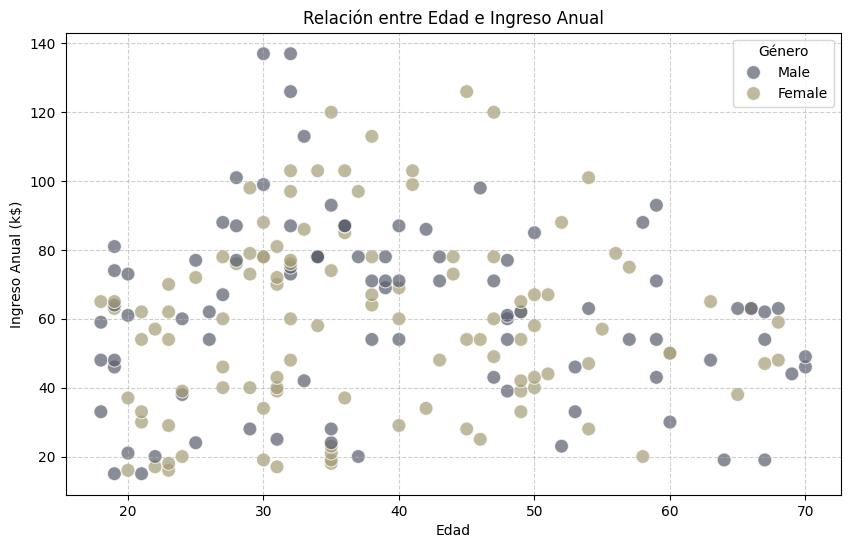

In [12]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Age', y='Annual Income (k$)', data=df, hue='Gender', palette='cividis', s=100, alpha=0.7)
plt.title('Relación entre Edad e Ingreso Anual')
plt.xlabel('Edad')
plt.ylabel('Ingreso Anual (k$)')
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend(title='Género')
plt.show()

### 9. ¿Cuál es la distribución conjunta de la edad y el ingreso anual?
- **Objetivo**: Entender cómo se distribuyen estas dos variables en conjunto.
- **Respuesta esperada**: Una gráfica de dispersión con una densidad de puntos o un gráfico de hexágonos que muestre la distribución conjunta de Age y Annual Income (k$).

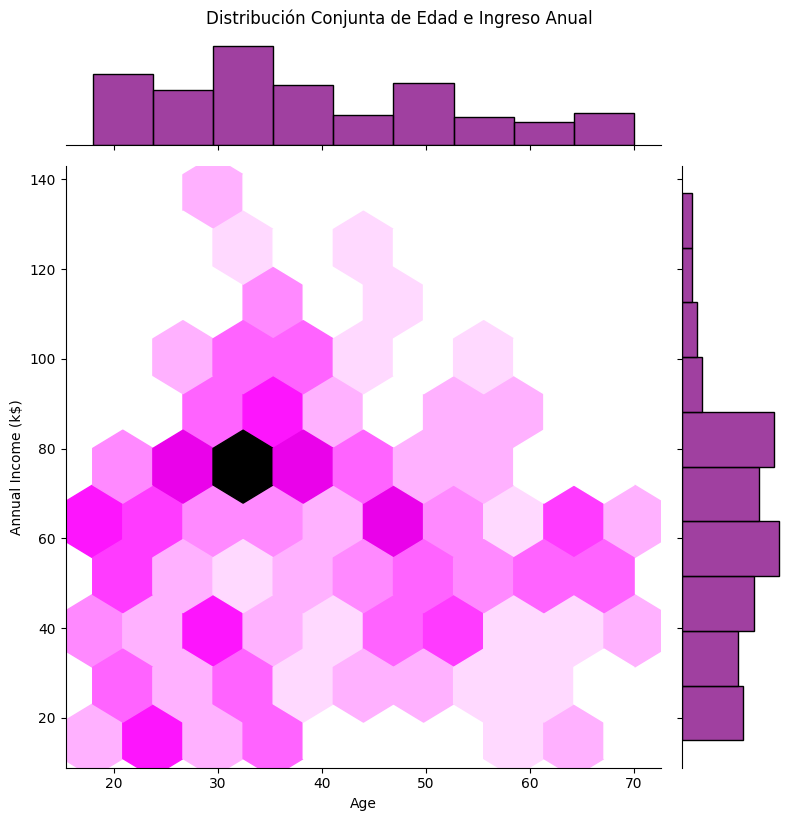

In [13]:
sns.jointplot(x='Age', y='Annual Income (k$)', data=df, kind='hex', height=8, color='purple')
plt.suptitle('Distribución Conjunta de Edad e Ingreso Anual', y=1.02)
plt.show()

### 10. ¿Cómo se distribuyen los clientes en función de la puntuación de gasto y el género?
- **Objetivo**: Analizar la relación entre la puntuación de gasto y el género.
- **Respuesta esperada**: Una gráfica de dispersión o un gráfico de violín que muestre la Spending Score (1-100) separada por género.

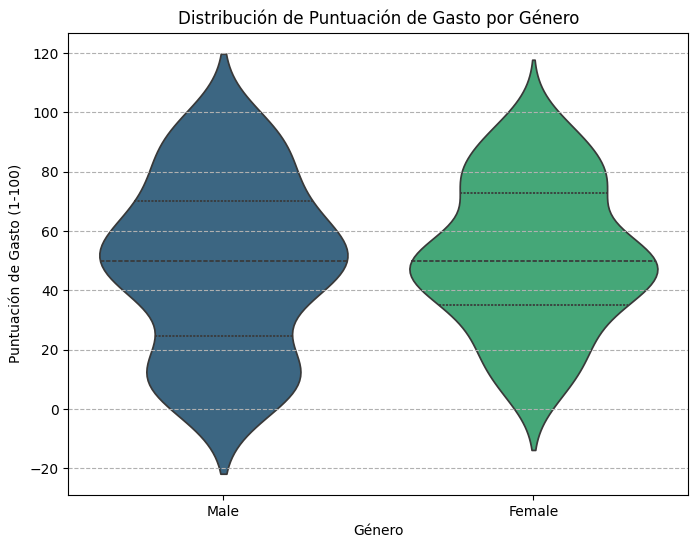

In [14]:
plt.figure(figsize=(8, 6))
# Gráfico de violín
sns.violinplot(x='Gender', y='Spending Score (1-100)', data=df, palette='viridis', inner='quartile')
plt.title('Distribución de Puntuación de Gasto por Género')
plt.xlabel('Género')
plt.ylabel('Puntuación de Gasto (1-100)')
plt.grid(axis='y', linestyle='--')
plt.show()